# This is a ML Model Developed Using Decision Tree to predict bank tern deposit payments or defaults by customers.

## Import the required libraries

In [94]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus
import seaborn as sns

## Read the Data from the CSV

In [95]:
dummy_df = pd.read_csv("bank.csv", na_values =['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [96]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Pre-Processing

In [97]:
contact_df = dummy_df

# Missing value check

In [98]:
#missing data
total = contact_df.isnull().sum().sort_values(ascending=False)
percent = (contact_df.isnull().sum()/contact_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


In [99]:
#dealing with missing data
contact_df = contact_df.drop((missing_data[missing_data['Total'] > 1]).index,axis=1)

contact_df.isnull().sum().max() #just checking that there's no missing data missing

0

In [100]:
# Note we dont find any lsssing values so we dont drop any coloulns or rows

In [101]:
# Dealing with unknown data in dataset

In [102]:
contact_df.count()

age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64

In [103]:
contact_df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [104]:
contact_df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [105]:
# we see in above that most of the data in poutcome is unknown.So we decide to drop it.

In [106]:
contact_df = contact_df.drop('poutcome',axis=1)

In [107]:
contact_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,no


In [108]:
contact_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,no


# Encoding

In [109]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day'] = le.fit_transform(res_df['day'])
#     res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [110]:
encoded_df = preprocessor(contact_df)



# 0 Variance Check

In [111]:
encoded_df.var()

age          1.419284e+02
job          1.040148e+01
marital      3.913158e-01
education    5.617170e-01
default      1.482586e-02
balance      1.040329e+07
housing      2.493000e-01
loan         1.137022e-01
contact      6.703087e-01
day          7.090885e+01
month        1.018848e+01
duration     1.204981e+05
campaign     7.409704e+00
pdays        1.182836e+04
previous     5.253297e+00
deposit      2.493380e-01
dtype: float64

In [112]:
# We see variance of default column is very low we dcide to drop it
encoded_df.drop('default',axis=1,inplace=True)

# Outlier removal

In [113]:


from scipy import stats
import functools

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
drop_numerical_outliers(encoded_df, z_thresh=3)

In [114]:
encoded_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,2343,1,0,2,4,8,1042,1,-1,0,1
2,41,9,1,1,1270,1,0,2,4,8,1389,1,-1,0,1
3,55,7,1,1,2476,1,0,2,4,8,579,1,-1,0,1
4,54,0,1,2,184,0,0,2,4,8,673,2,-1,0,1
5,42,4,2,2,0,1,1,2,4,8,562,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,19,0,257,1,-1,0,0
11158,39,7,1,1,733,0,0,2,15,6,83,4,-1,0,0
11159,32,9,2,1,29,0,0,0,18,1,156,2,-1,0,0
11160,43,9,1,1,0,0,1,0,7,8,9,2,172,5,0


# Correlation Check

                age       job   marital  education   balance   housing  \
age        1.000000 -0.040404 -0.448322  -0.115848  0.114791 -0.146966   
job       -0.040404  1.000000  0.081087   0.149552  0.039727 -0.137175   
marital   -0.448322  0.081087  1.000000   0.124196 -0.007405 -0.039295   
education -0.115848  0.149552  0.124196   1.000000  0.055451 -0.121092   
balance    0.114791  0.039727 -0.007405   0.055451  1.000000 -0.088565   
housing   -0.146966 -0.137175 -0.039295  -0.121092 -0.088565  1.000000   
loan      -0.017519 -0.066531 -0.064407  -0.074295 -0.106776  0.074474   
contact    0.026311 -0.086342 -0.058604  -0.135014 -0.034357  0.234483   
day        0.000327  0.023931 -0.001254   0.018637  0.012411 -0.012032   
month     -0.031020 -0.074723  0.000447  -0.063545  0.032087  0.227375   
duration  -0.004177 -0.003211  0.007576  -0.012846  0.030156  0.029187   
campaign   0.021527  0.007767 -0.036467  -0.012006 -0.017784 -0.010234   
pdays     -0.007282 -0.010855  0.02881

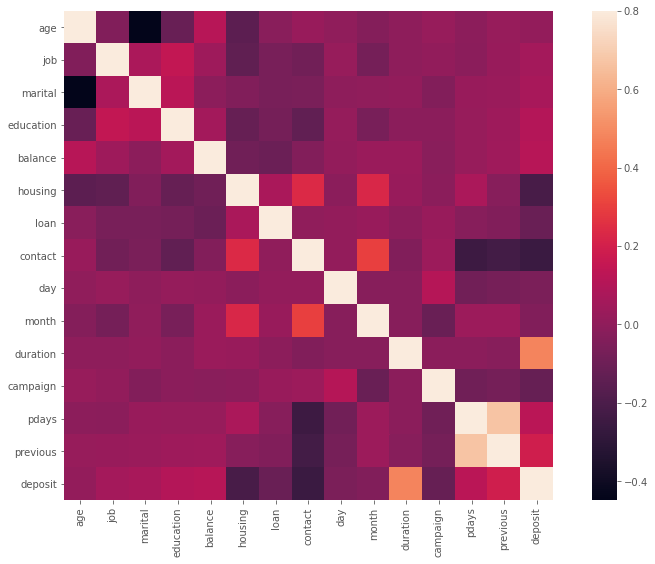

In [115]:
#before correlation check we did the label encodinga s there are many categorical variables so we need to account for them in correlation too
# Variable Correlation Check

#correlation matrix
corrmat = encoded_df.corr()
print (corrmat)
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

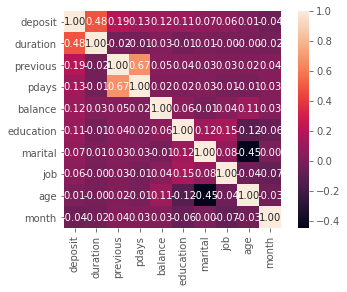

In [116]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'deposit')['deposit'].index
cm = np.corrcoef(encoded_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Note in above we didnt find any major correlation among variables which willl necessitate coloumn dropping

In [117]:
x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

In [118]:
encoded_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,2343,1,0,2,4,8,1042,1,-1,0,1
2,41,9,1,1,1270,1,0,2,4,8,1389,1,-1,0,1
3,55,7,1,1,2476,1,0,2,4,8,579,1,-1,0,1
4,54,0,1,2,184,0,0,2,4,8,673,2,-1,0,1
5,42,4,2,2,0,1,1,2,4,8,562,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,19,0,257,1,-1,0,0
11158,39,7,1,1,733,0,0,2,15,6,83,4,-1,0,0
11159,32,9,2,1,29,0,0,0,18,1,156,2,-1,0,0
11160,43,9,1,1,0,0,1,0,7,8,9,2,172,5,0


## Split the data into Train-Test

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Build the Decision Tree Model

In [120]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [147]:
#Decision tree

model_dt = DecisionTreeClassifier(random_state=30)



In [122]:
# Grid Search CV Code
# np.random.seed(42)
# start = time.time()

# param_dist = {'max_depth': np.arange(0,50),
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'min_samples_split':np.arange(0,50),
#               'min_samples_leaf':np.arange(0,20),
#               'criterion': ['gini', 'entropy']}

# cv_rf = GridSearchCV(model_dt, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = -2)

# cv_rf.fit(x_train, y_train)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))


In [156]:
# Decision tree with depth = 15
model_dt_15 = DecisionTreeClassifier(random_state=30, max_depth=15, criterion = "gini",max_features=None
                                     ,min_samples_leaf =7,min_samples_split=48)
model_dt_15.fit(x_train, y_train)
model_dt_15_score_train = model_dt_15.score(x_train, y_train)
print("Training score: ",model_dt_15_score_train)
model_dt_15_score_test = model_dt_15.score(x_test, y_test)
print("Testing score: ",model_dt_15_score_test)
y_pred_dt = model_dt_15.predict_proba(x_test)[:, 1]

Training score:  0.8599900965585541
Testing score:  0.8376237623762376


#### Performance Metrics

In [157]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [158]:
predictions = model_dt_15.predict(x_test)
predictions

array([1, 0, 1, ..., 0, 0, 1])

In [159]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

In [160]:
y_actual_result=np.empty(1,dtype=int)

for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [161]:
y_actual_result

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

## Recall

In [162]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.8066528066528067


## Area Under the Curve

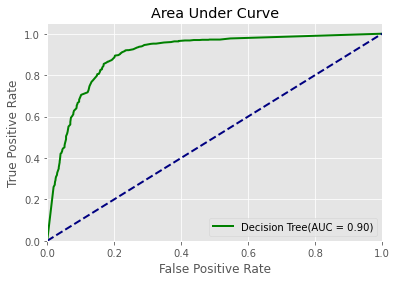

In [163]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [164]:
print (confusion_matrix(y_test, predictions))

[[916 185]
 [143 776]]


In [165]:
len(y_test)

2020

In [166]:
len(predictions)

2020

# Accuracy Check

In [167]:
accuracy_score(y_test, predictions)

0.8376237623762376

In [168]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Confusion Matrix

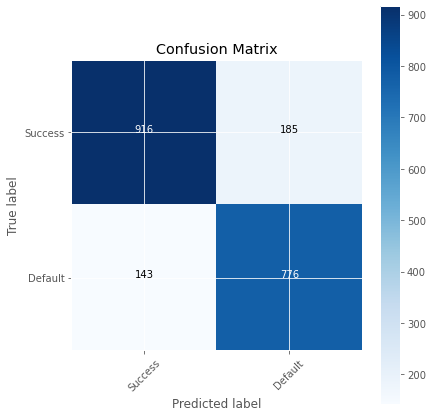

In [169]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# The above Decsion Tree Model can detect with about 82 percent accuracy whether a customer will pay his term deposit or not.